In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans


def split_image(image, num_clusters):
    # Reshape the image into a 2D array of pixels
    pixels = image.reshape((-1, 3))

    # Perform k-means clustering to group similar pixels
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixels)
    labels = kmeans.labels_

    # Reshape the labels back into the original image shape
    labels = labels.reshape(image.shape[:2])

    # Split the image based on the clusters
    fragments = []
    for cluster_label in range(num_clusters):
        mask = labels == cluster_label
        fragment = cv2.bitwise_and(image, image, mask=np.uint8(mask))
        fragments.append(fragment)

    return fragments

# Load the image
# image = cv2.imread("dataset/trainset/images/agly-rd81_1-2023-04-08T08_52_10.jpg")
image = cv2.imread("sample.jpg")

# Define the number of clusters (colors) and fragment size
num_clusters = 20

# Split the image into coherent fragments based on color and position
coherent_fragments = split_image(image, num_clusters)

# Now 'coherent_fragments' contains the coherent fragments of the image based on color and position

C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Original image')

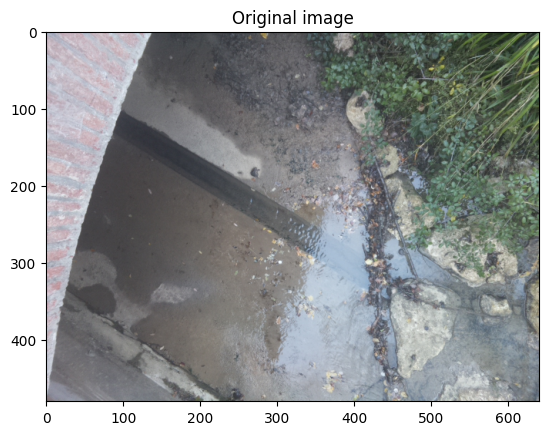

In [2]:
import matplotlib.pyplot as plt

# Display the original image
plt.figure()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original image")


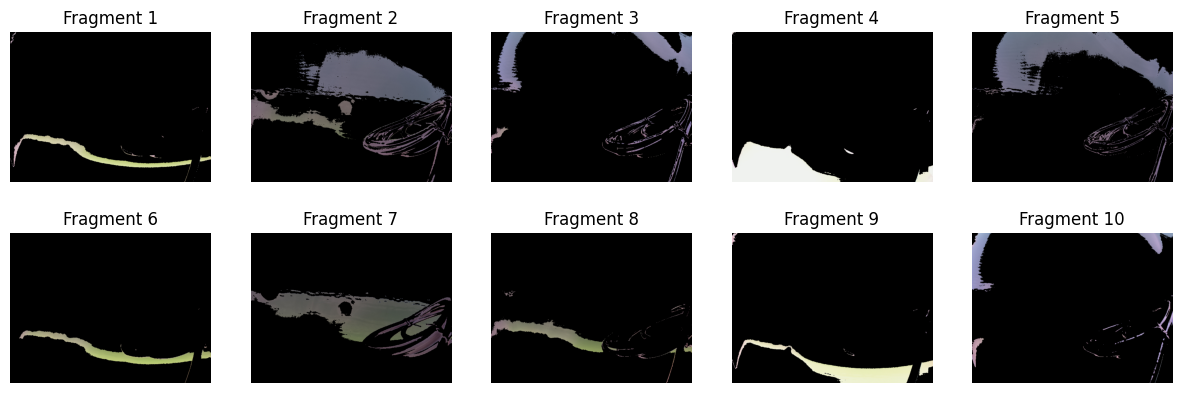

In [20]:
# Display the coherent fragments
plt.figure(figsize=(15, 10))
for i, fragment in enumerate(coherent_fragments):
    plt.subplot(4, 5, i+1)
    plt.imshow(cv2.cvtColor(fragment, cv2.COLOR_BGR2RGB))
    plt.title(f"Fragment {i+1}")
    plt.axis('off')
plt.show()


In [23]:
import torch
import torchvision
import numpy as np
from PIL import Image

# Define the U-Net model
model = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)

# Set the model to evaluation mode
model.eval()

# Load and preprocess the image
image = Image.open("dataset/trainset/images/agly-rd81_1-2023-04-08T08_52_10.jpg")
preprocess = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# Perform inference
with torch.no_grad():
    output = model(input_batch)["out"][0]
output_predictions = output.argmax(0)

# Convert predictions to numpy array
predicted_mask = output_predictions.cpu().numpy()

# Now 'predicted_mask' contains the predicted segmentation mask
# You can use this mask to segment the image into coherent fragments

C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


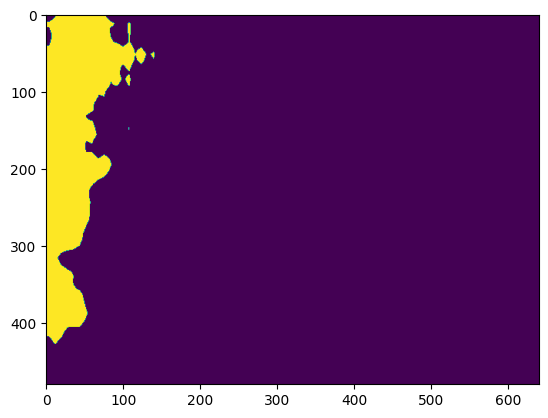

In [25]:
predicted_mask.shape
plt.imshow(predicted_mask)